## Khanal and Sooksatra Work

In [15]:
'''
The following notebook is inspired from example_6 on the provided notebooks.
'''

'\nThe following notebook is inspired from example_6 on the provided notebooks.\n'

In [16]:
from lambeq import BobcatParser,AtomicType,IQPAnsatz
from pytket.circuit.display import render_circuit_jupyter

In [17]:
sentence = "This is QNLP assignment. Lets Try something new."

#Generating a diagram for above sentence.
parser = BobcatParser(verbose='text')
diagram1 = parser.sentence2diagram(sentence)
diagram1

Diagram(dom=Ty(), cod=Ty('s'), boxes=[Word('This', Ty('n')), Word('is', Ty(Ob('n', z=1), 's', Ob('n', z=-1))), Word('QNLP', Ty('n', Ob('n', z=-1))), Word('assignment.', Ty('n')), Word('Lets', Ty(Ob('n', z=1), 'n', Ob('s', z=-1), 'n')), Word('Try', Ty(Ob('n', z=1), 's', Ob('n', z=-1))), Word('something', Ty('n')), Word('new.', Ty(Ob('n', z=1), 'n')), Cup(Ty(Ob('n', z=-1)), Ty('n')), Cup(Ty('n'), Ty(Ob('n', z=1))), Cup(Ty(Ob('n', z=-1)), Ty('n')), Cup(Ty('n'), Ty(Ob('n', z=1))), Cup(Ty(Ob('s', z=-1)), Ty('s')), Cup(Ty('n'), Ty(Ob('n', z=1))), Cup(Ty(Ob('n', z=-1)), Ty('n')), Cup(Ty('n'), Ty(Ob('n', z=1)))], offsets=[0, 1, 4, 6, 7, 11, 14, 15, 5, 12, 11, 8, 7, 4, 3, 0])

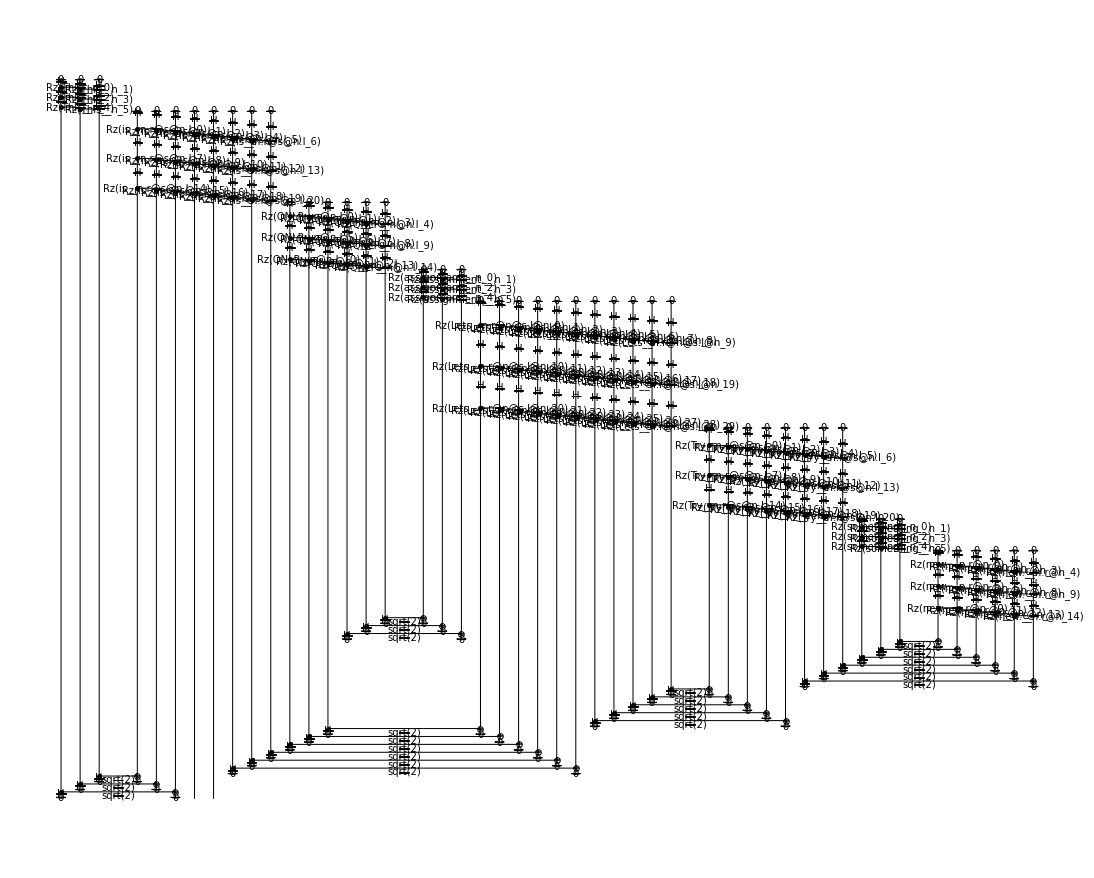

In [18]:
# Lets generate a circuit by assigning a qubit for noun and the sentence.capitalize
'''
We define atomic type below.
1. For sentence.
2. For Noun
'''
S = AtomicType.SENTENCE
N = AtomicType.NOUN

#Lets generate a quantum citcuit for above string diagram defined by Bobcatparser
ansatz1 = IQPAnsatz({N:3,S:2}, n_layers=3)
discopy_circuit1 = ansatz1(diagram1)
discopy_circuit1.draw(figsize = (15,12))

With 2 sentences and 3 nouns and 3 layers, we got the above circuit diagram. The diagram is difficult to read. We tried to follow the documentation of lambeq to better understand the parameters definition, but the github page is apparantly broken.
This, we implement the circuit with single sentence and a noun below.

In [19]:
sentence2 = "QNLP Assignment."

#Generating a diagram for above sentence.
parser = BobcatParser(verbose='text')
diagram = parser.sentence2diagram(sentence2)
diagram

Diagram(dom=Ty(), cod=Ty('n'), boxes=[Word('QNLP', Ty('n', Ob('n', z=-1))), Word('Assignment.', Ty('n')), Cup(Ty(Ob('n', z=-1)), Ty('n'))], offsets=[0, 2, 1])

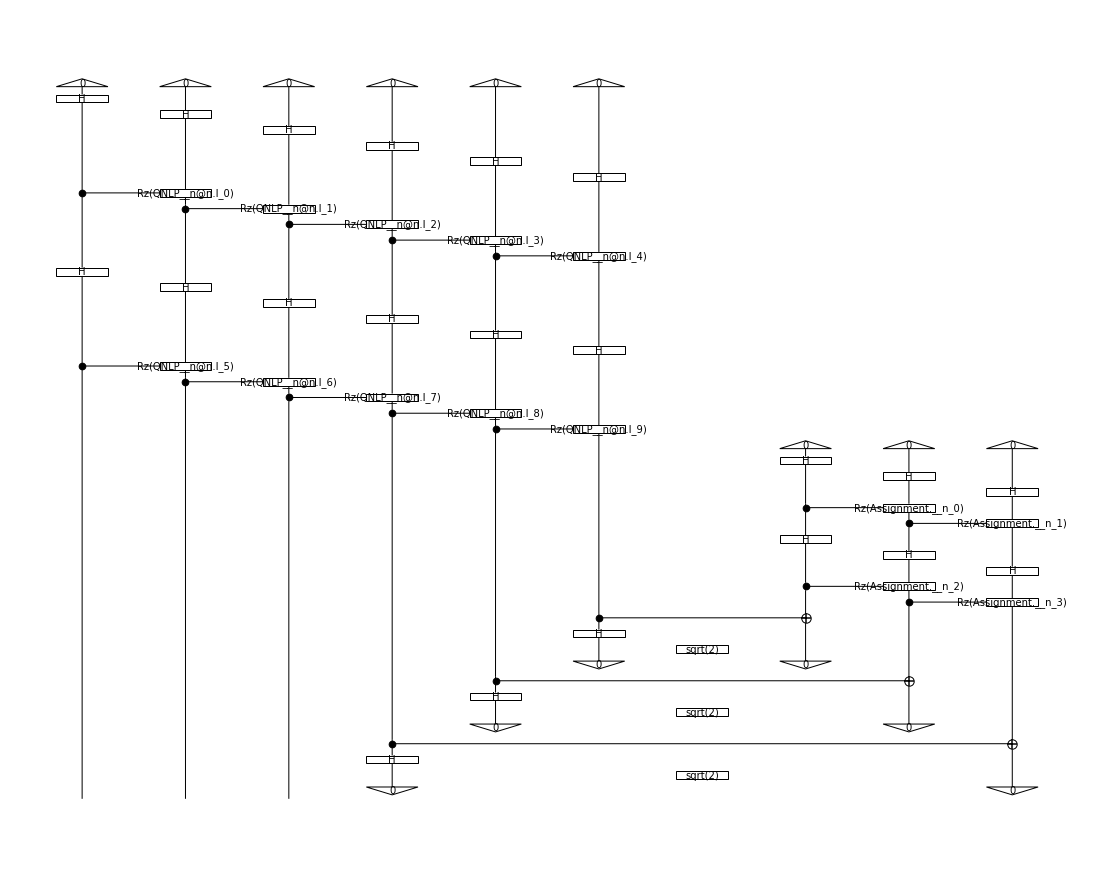

In [20]:
S = AtomicType.SENTENCE
N = AtomicType.NOUN

#Lets generate a quantum citcuit for above string diagram defined by Bobcatparser
ansatz = IQPAnsatz({N:3,S:2}, n_layers=2)
discopy_circuit = ansatz(diagram)
discopy_circuit.draw(figsize = (15,12))

The above generated figure is much better and easy to read.

In [21]:
#Converting to pytek form
tket_circuit = discopy_circuit.to_tk()
render_circuit_jupyter(tket_circuit)

In [22]:
'''The circuit looks amazing and easy to follow. 
Few things to note here. We see that we need 9 qubits and 5 classical bits to represent the the sentence "QNLP Assignment."
1. We see that the used gates are HADAMARD, CNOT, Rz, and controlled RZ gates.
Infact, {CNOT, Rz,Ry} and {CNOT, T, H} are sets of universal gates that can implement any computation in quantum computing.
While these gates are easy to implemet with few qubits, 1,2 they can executem a computation with multiple qubits.
Few inputs on diagram.
1. The first layer of hadamard gates, H, transforms all the qubits to superposition.
2. CRz gate applies Rz rotation to target qubits if the controlled qubits is 1.
3. CNOT applies X gate to the target qubits if the controlled qubit is 1.
4. After a measurement all the states collapse to the computational basis states with certain probability.
5. Since the measurement is done in Z-basis, we are guranteed to get an output in computational basis states. |0> or |1>.
'''


'The circuit looks amazing and easy to follow. \nFew things to note here. We see that we need 9 qubits and 5 classical bits to represent the the sentence "QNLP Assignment."\n1. We see that the used gates are HADAMARD, CNOT, Rz, and controlled RZ gates.\nInfact, {CNOT, Rz,Ry} and {CNOT, T, H} are sets of universal gates that can implement any computation in quantum computing.\nWhile these gates are easy to implemet with few qubits, 1,2 they can executem a computation with multiple qubits.\nFew inputs on diagram.\n1. The first layer of hadamard gates, H, transforms all the qubits to superposition.\n2. CRz gate applies Rz rotation to target qubits if the controlled qubits is 1.\n3. CNOT applies X gate to the target qubits if the controlled qubit is 1.\n4. After a measurement all the states collapse to the computational basis states with certain probability.\n5. Since the measurement is done in Z-basis, we are guranteed to get an output in computational basis states. |0> or |1>.\n'

In [23]:
# Lets try to generate a circuit diagram for two sentences inputs.
tket_circuit1 = discopy_circuit1.to_tk()
render_circuit_jupyter(tket_circuit1)


Well. For an input with 2 sentence we need much more qubits and classical bits.
we will continue with second input sentence.

<!-- lets try this for first input. With two sentences. -->

In [24]:
# Lets get a qiskit circuits
from pytket.extensions.qiskit import tk_to_qiskit
qiskit_circuit = tk_to_qiskit(tket_circuit)
qiskit_circuit.draw()


┌───┐                                       ┌───┐            »
q_0: ┤ H ├─────────────■─────────────────────────┤ H ├────────────»
     ├───┤ ┌───────────┴───────────┐             └───┘            »
q_1: ┤ H ├─┤ Rz(2*π*QNLP__n@n.l_0) ├───────────────■──────────────»
     ├───┤ └───────────────────────┘   ┌───────────┴───────────┐  »
q_2: ┤ H ├─────────────────────────────┤ Rz(2*π*QNLP__n@n.l_1) ├──»
     ├───┤                             └───────────────────────┘  »
q_3: ┤ H ├────────────────────────────────────────────────────────»
     ├───┤                                                        »
q_4: ┤ H ├────────────────────────────────────────────────────────»
     ├───┤                                                        »
q_5: ┤ H ├────────────────────────────────────────────────────────»
     ├───┤                                       ┌───┐            »
q_6: ┤ H ├─────────────■─────────────────────────┤ H ├────────────»
     ├───┤┌────────────┴─────────────┐           └───┘            »
q_7: ┤ H ├┤ Rz(2*π*Assignment.__n_0) ├─────────────■──────────────»
     ├───┤└──────────────────────────┘┌────────────┴─────────────┐»
q_8: ┤ H ├────────────────────────────┤ Rz(2*π*Assignment.__n_1) ├»
     └───┘                            └──────────────────────────┘»
c: 6/═════════════════════════════════════════════════════════════»
                                                                  »
«                                                          »
«q_0: ──────────────────────────────────────■──────────────»
«               ┌───┐           ┌───────────┴───────────┐  »
«q_1: ──────────┤ H ├───────────┤ Rz(2*π*QNLP__n@n.l_5) ├──»
«               └───┘           └─────────┬───┬─────────┘  »
«q_2: ────────────■───────────────────────┤ H ├────────────»
«     ┌───────────┴───────────┐           └───┘            »
«q_3: ┤ Rz(2*π*QNLP__n@n.l_2) ├─────────────■──────────────»
«     └───────────────────────┘ ┌───────────┴───────────┐  »
«q_4: ──────────────────────────┤ Rz(2*π*QNLP__n@n.l_3) ├──»
«                               └───────────────────────┘  »
«q_5: ─────────────────────────────────────────────────────»
«                                                          »
«q_6: ──────────────────────────────────────■──────────────»
«               ┌───┐          ┌────────────┴─────────────┐»
«q_7: ──────────┤ H ├──────────┤ Rz(2*π*Assignment.__n_2) ├»
«               ├───┤          └──────────────────────────┘»
«q_8: ──────────┤ H ├──────────────────────────────────────»
«               └───┘                                      »
«c: 6/═════════════════════════════════════════════════════»
«                                                          »
«                                                          »
«q_0: ─────────────────────────────────────────────────────»
«                                                          »
«q_1: ─────────────■───────────────────────────────────────»
«      ┌───────────┴───────────┐                           »
«q_2: ─┤ Rz(2*π*QNLP__n@n.l_6) ├──────────────■────────────»
«      └─────────┬───┬─────────┘  ┌───────────┴───────────┐»
«q_3: ───────────┤ H ├────────────┤ Rz(2*π*QNLP__n@n.l_7) ├»
«                └───┘            └─────────┬───┬─────────┘»
«q_4: ─────────────■────────────────────────┤ H ├──────────»
«      ┌───────────┴───────────┐            ├───┤          »
«q_5: ─┤ Rz(2*π*QNLP__n@n.l_4) ├────────────┤ H ├──────────»
«      └───────────────────────┘            └───┘          »
«q_6: ─────────────────────────────────────────────────────»
«                                                          »
«q_7: ─────────────■───────────────────────────────────────»
«     ┌────────────┴─────────────┐                         »
«q_8: ┤ Rz(2*π*Assignment.__n_3) ├─────────────────────────»
«     └──────────────────────────┘                         »
«c: 6/═════════════════════════════════════════════════════»
«                                                          »
«              

The two circuits for "QNLP Assignment" are similar. Qiskit also generated a circuit implementing a universal gate set {CNOT, Rz, H}. It also requires 9 qubits and 6 classical bits.
However, qiskit circuit does not specify the measurement basis. We believe all the measurements in qiskits are done in computational basis.

In [25]:
qiskit_circuit.h(0)

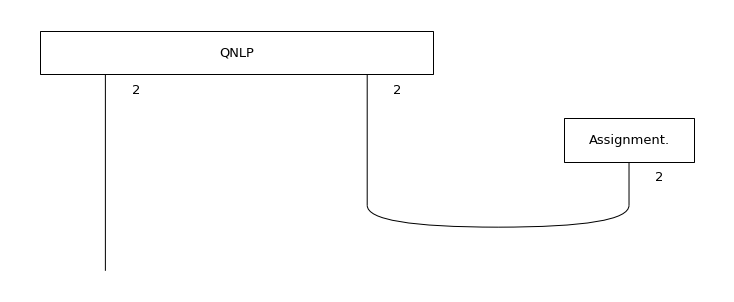

In [28]:
from lambeq import TensorAnsatz
from discopy import Dim

tensor_ansatz = TensorAnsatz({N: Dim(2), S: Dim(2)})
tensor_diagram = tensor_ansatz(diagram)

tensor_diagram.draw(figsize=(10,4), fontsize=13)

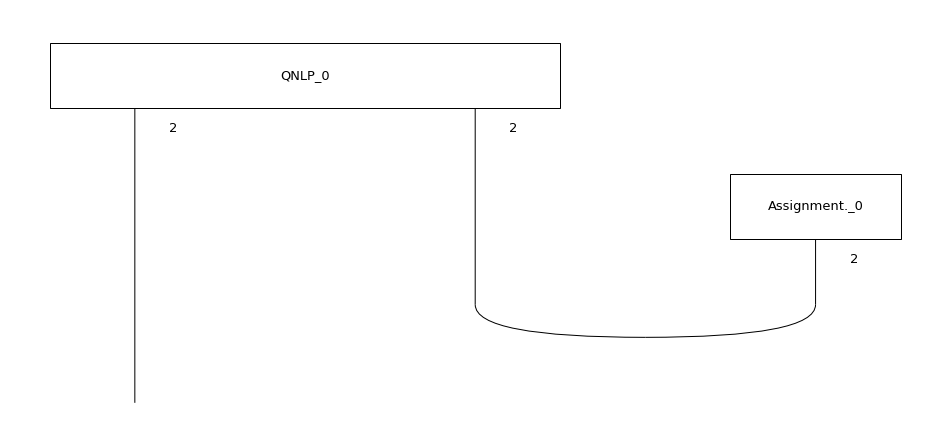

In [29]:
from lambeq import SpiderAnsatz
from discopy import Dim

spider_ansatz = SpiderAnsatz({N: Dim(2), S: Dim(2)})
spider_diagram = spider_ansatz(diagram)
spider_diagram.draw(figsize=(13,6), fontsize=13)

In [26]:
from platform import python_version
import pytket
import qiskit

print("python version: ", python_version())
print("pytket version: ", pytket.__version__)
print("qiskit version: ", qiskit.__version__)

python version:  3.9.7
pytket version:  1.1.0
qiskit version:  0.20.1
